## The Comparison of The Russian Five-Act Verse Comedy and Tragedy

In this analysis, we will compare Sperantov's data on the five-act verse tragedies (with heterogeneity issue addressed) and our data on the five-act comedies. The basis for the comparison were three formal features describing stage-directions:

- Stage directions frequency;
- Average length of a stage direction;
- The degree of verse and prose interaction.

In our previous re-examination of Sperantov's results, we determined that the five-act tragedies fall into two periods:

 - Period One (from 1747 to 1794)
 - Period Two (from 1795 to 1822).
 
 The boundary between the two periods lies in 1795.
 
We hypothesized that the Russian five-act comedy would also fall into two periods with the boundary in 1795. However, the years that determine the lower and the upper boundaries were different (the first five-act verse comedy was written in 1775 and the last one in 1849). The two tentative periods included: 

- Period One (from 1775 to 1794)
- Period Two (from 1795 to 1849).

Our statistical tests showed that there were no significant differences between these two proposed periods. This outcome could be, in part, explained by the small sample size, which we could not help due to the historical nature of our research. Nevertheless, to trace the features’ historical development, we still used these periods, calling them “tentative.” Additionally, to compare apples to apples, we made sure that the comedies and tragedies’ upper and lower boundaries were the same: between **1775** and **1822**. Finally, not for contrastive purposes but to understand the historical processes, we also examined the tragedies written before 1775 and comedies written after 1822.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
# updated boundaries
def determine_period(row):
    if row <= 1794:
        period = 1
    else:
        period = 2
    
    return period

In [3]:
comedies = pd.read_csv('../Russian_Comedies/Data/Comedies_Raw_Data.csv')
# sort by creation date
comedies_sorted = comedies.sort_values(by='creation_date').copy()

In [4]:
comedies_sorted.head()

,index,title,first_name,last_name,creation_date,translation/adaptation,num_acts,free_iambs,num_present_characters,num_scenes_text,...,percentage_open_scenes,percentage_scenes_rhymes_split_verse,num_stage_directions,stage_directions_frequency,num_word_tokens_in_stage_directions,average_length_of_stage_direction,num_verse_splitting_stage_directions,degree_of_verse_prose_interaction,number_scenes_with_discontinuous_change_characters,percentage_scenes_with_discontinuous_change_characters
0,R_1,Samoliubivyi stikhotvorets,Nikolai,Nikolev,1775,0,5,0,8,37,...,65.217,17.391,406,24.458,1102,2.714,161,9.699,3,6.667
1,R_2,Khvastun,Iakov,Kniazhnin,1785,0,5,0,14,50,...,47.273,14.545,356,17.298,893,2.508,104,5.053,2,3.636
3,R_4,Prestupnik ot igry ili bratom prodannaia sestra,Dmitrii,Efim’ev,1788,0,5,0,8,43,...,48.077,11.538,299,22.669,782,2.615,90,6.823,5,9.615
2,R_3,Chudaki,Iakov,Kniazhnin,1790,0,5,0,15,44,...,51.667,6.667,386,16.489,1078,2.793,139,5.938,2,3.333
4,R_5,Smekh i gore,Aleksandr,Klushin,1792,0,5,0,9,56,...,6.667,3.333,255,14.522,771,3.024,64,3.645,4,6.667


In [5]:
# renaname the columns to make sure the names match with the tragedies file
comedies_sorted = comedies_sorted.rename(columns={'stage_directions_frequency': 'frequency',
                                                   'average_length_of_stage_direction': 'average_length',
                                                   'degree_of_verse_prose_interaction': 'verse_prose_interaction'})

In [6]:
# select only original comedies and five act
original_comedies = comedies_sorted[(comedies_sorted['translation/adaptation'] == 0) & 
                                   (comedies_sorted['num_acts'] == 5)].copy()
# break down into tentative periods
original_comedies['period'] = original_comedies.creation_date.apply(determine_period)

# make sure we select only the time periods that correspond with tragedies
comedies_stage_dir_features = original_comedies[original_comedies.creation_date <=1822].copy()

# select the stage directions features
comedies_stage_dir_features = comedies_stage_dir_features[['period',
                                               'frequency',
                                               'average_length',
                                               'verse_prose_interaction']].copy()

In [7]:
# read in the tragedies data
sperantov_data = pd.read_csv('Sperantov_Tragedy/sperantov_raw_data.tsv', sep='\t')

# remove tragedies which are not five acts or are translations/ immitations
sperantov_data_five_acts = sperantov_data[(sperantov_data['num_acts']==5) & 
                                         (sperantov_data['translation/adaptation/mixed_genre'] == 0)].copy()

# since we are mainly interested in different periods, we will update the years so that they remain in the same period,
# but are easier to convert to numeric data format  
sperantov_data_five_acts.loc[sperantov_data_five_acts[
                            sperantov_data_five_acts.date == 'mid-1770s'].index[0], 'date'] = 1775
sperantov_data_five_acts.loc[sperantov_data_five_acts[
                            sperantov_data_five_acts.date == 'around 1787'].index[0], 'date'] = 1787
sperantov_data_five_acts.loc[sperantov_data_five_acts[
                            sperantov_data_five_acts.date == '1808-1809'].index, 'date'] = 1808

sperantov_data_five_acts.loc[sperantov_data_five_acts[
                            sperantov_data_five_acts.date == '1810s'].index, 'date'] = 1811

sperantov_data_five_acts['date'] = sperantov_data_five_acts['date'].astype(int)

tragedies_data = sperantov_data_five_acts.sort_values(by='date').copy()
# make sure we limit the lower time boundary to match that of comedies
tragedies_data = tragedies_data[tragedies_data .date >= 1775].copy()
tragedies_data['period'] = tragedies_data.date.apply(determine_period)

In [8]:
tragedies_data = tragedies_data[['period',
                               'frequency', 
                               'average_length',
                               'verse_prose_interaction']].copy()

## Part 1. Compararison in The Aggregate

### Five-Act Comedy in Verse

In [9]:
comedies_stage_dir_features_summary = comedies_stage_dir_features.describe().loc[['mean', 
                                                                                'std',
                                                                                '50%'], 
                                                                                ['frequency', 
                                                                                 'average_length',
                                                                                 'verse_prose_interaction']]
comedies_stage_dir_features_summary.style.set_properties(**{'text-align': 'right'})
comedies_stage_dir_features_summary = comedies_stage_dir_features_summary.round(2)
comedies_stage_dir_features_summary

,frequency,average_length,verse_prose_interaction
mean,18.16,2.52,6.90
std,5.23,0.72,3.47
50%,17.30,2.51,6.82


In [10]:
comedies_stage_dir_features_summary.to_csv('../Russian_Comedies/Data/summary_comedies_stage_directions.csv', 
                                           index=True)

### Five-Act Tragedy in Verse

In [11]:
tragedies_summary = tragedies_data.describe().loc[['mean', 
                                                   'std',
                                                   '50%'],
                                                   ['frequency', 
                                                   'average_length',
                                                   'verse_prose_interaction']].round(2)
tragedies_summary = tragedies_summary.round(2)
tragedies_summary

,frequency,average_length,verse_prose_interaction
mean,7.15,3.79,1.38
std,4.86,0.94,1.46
50%,5.84,3.57,0.86


In [12]:
tragedies_summary.to_csv('../Russian_Comedies/Data/summary_tragedies_stage_directions.csv', 
                                           index=True)

### Aggregate Summary:
1. Overall, stage directions were much more frequent in comedies than in tragedies. The mean frequency of stage direction in comedies (1775 to 1822) was 18.16, with a standard deviation of 5.23. In tragedies, it was 7.15, i.e., over two times lower, with a standard deviation of 4.86. The median frequency of stage directions in comedies was 17.30, whereas, in tragedies, it was 5.84, i.e., almost three times lower.
2. The mean degree of verse and prose interaction in comedy was 6.90, with a standard deviation of 3.47. In tragedy, it was 1.38, i.e., five times lower, with a standard deviation of 1.46. The median degree of verse and prose interaction in comedy was 6.82, and in tragedy, it was 0.86, i.e., almost eight times as low. In comedy, stage directions much more frequently appeared within verse lines.
3.•	The mean average length of a stage direction in comedies within that time frame was 2.52, with a standard deviation of 0.72, whereas in tragedies, it was 3.79, with a standard deviation of 0.94. The median in comedy was 2.51, and in tragedy, it was 3.57. Stage directions tended to be longer in tragedies than in comedies.

## Part 2. Comparison By Tentative Periods

### Five-Act Comedy in Verse

#### By Tentative Periods

In [13]:
comedies_stage_dir_features_summary = comedies_stage_dir_features.groupby('period').describe().loc[:,
                                                                         [('frequency','mean'),
                                                                          ('frequency', 'std'),
                                                                          ('frequency','50%'),
                                                                          ('average_length','mean'),
                                                                          ('average_length', 'std'),
                                                                          ('average_length','50%'),
                                                                          ('verse_prose_interaction','mean'),
                                                                          ('verse_prose_interaction', 'std'),
                                                                          ('verse_prose_interaction', '50%')
                                                                         ]]

comedies_stage_dir_features_summary.style.set_properties(**{'text-align': 'right'})
comedies_stage_dir_features_summary.round(2)

frequency              average_length              \
            mean   std    50%           mean   std   50%   
period                                                     
1          18.51  4.06  16.89           2.84  0.33  2.75   
2          17.87  6.38  19.60           2.23  0.86  2.50   

       verse_prose_interaction              
                          mean   std   50%  
period                                      
1                         6.12  2.04  5.76  
2                         7.57  4.41  7.74

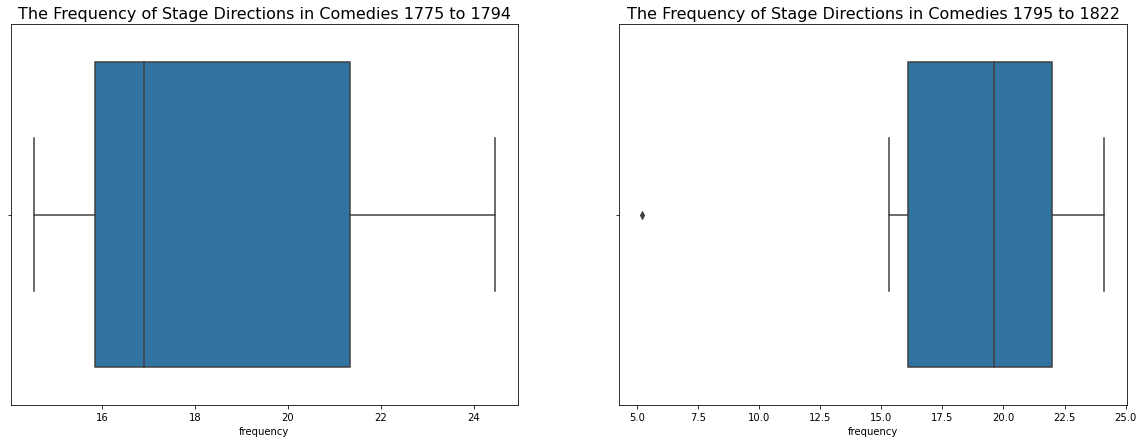

In [14]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
plt.title('The Frequency of Stage Directions in Comedies 1775 to 1794', fontsize=16)
sns.boxplot(x=comedies_stage_dir_features[comedies_stage_dir_features.period == 1]['frequency'])

plt.subplot(122)
plt.title('The Frequency of Stage Directions in Comedies 1795 to 1822', fontsize=16)
sns.boxplot(x=comedies_stage_dir_features[comedies_stage_dir_features.period == 2]['frequency'])

plt.show()

In [15]:
original_comedies[original_comedies['frequency'] <6][['title', 
                                                       'first_name', 
                                                       'last_name', 
                                                       'creation_date', 
                                                       'frequency']]

,title,first_name,last_name,creation_date,frequency
10,Tri zhenikha ili liubov‘ nyneshniago sveta,Aleksandr,Sobolev,1817,5.229


### Five-Act Tragedy in Verse

### By Tentative Periods

In [16]:
trqagedies_summary = tragedies_data.groupby('period').describe().loc[:,
                                                                     [('frequency','mean'),
                                                                      ('frequency', 'std'),
                                                                      ('frequency','50%'),
                                                                      ('average_length','mean'),
                                                                      ('average_length', 'std'),
                                                                      ('average_length','50%'),
                                                                      ('verse_prose_interaction','mean'),
                                                                      ('verse_prose_interaction', 'std'),
                                                                      ('verse_prose_interaction', '50%')
                                                                     ]].round(2)
trqagedies_summary.style.set_properties(**{'text-align': 'right'})
trqagedies_summary.round(2)

frequency             average_length              \
            mean   std   50%           mean   std   50%   
period                                                    
1           5.56  1.79  4.94           3.33  0.50  3.32   
2           8.32  6.03  6.39           4.13  1.04  4.36   

       verse_prose_interaction              
                          mean   std   50%  
period                                      
1                         0.75  0.47  0.60  
2                         1.84  1.75  1.45

### Five-Act Tragedies in Verse

### Summary by Tentative Periods 

1. The mean frequency of stage directions was higher in comedies than in tragedies in every period: in Period One 18.51 in comedies, 5.56 in tragedies, in Period Two, 17.87 in comedies and 8.32 in tragedies. At first sight, it appears that overall, the frequency of stage directions in comedies decreased, however, more exploration showed that the frequency of stage directions in comedies of Period Two was affected by an extremely low outlier, Aleksandr Sobolev's *Tri zhenikha ili liubov‘ nyneshniago sveta* (1817) with stage directions frequency 5.229. If we look at the median stage directions frequency in comedy, it has increased from 16.89 to 19.60 in comedy from tentative Period One to tentative Period Two. The median frequency of stage directions also increased in tragedy from 4.94 to 6.39. The standard deviation increased in comedy from 4.06 to 6.38, and in tragedy, more than threefold, from 1.79 to 6.39.
2. The average length of a stage direction tended to be longer in tragedies in every period: in the comedy of Period One, it was 2.84, with a standard deviation of 0.33, and in the tragedy of Period One, it was 3.33, with a standard deviation of 0.50. In Period Two, in comedy it decreased to 2.23; the same trend is observed in the median, which decreased from 2.75 to 2.5. In tragedy, the average length of a stage direction increased to 4.13, with a standard deviation of 1.04. The median also increased from 3.32 to 4.36.
3. The mean degree of verse and prose interaction was higher in comedy in every period examined. In the tentative Period One, the mean degree of verse and prose interaction in comedy was 6.12, with a standard deviation of 2.04. In tragedy, it was 0.75, with a standard deviation of 0.47. In Period Two, in comedy, the mean was 7.57, with a standard deviation of 4.41. In tragedy, the mean was 1.84, with a standard deviation of 1.75. The medians for the two periods were also consistently higher in comedy than in tragedy (5.76 and 7.74 in comedy vs. 0.6 and 1.45 in tragedy.

## Part 3. Tragedies Before 1775 and Comedies After 1822

To compare two genres, we had to use the same time boundaries: from 1775 to 1822 when both comedies and tragedies were written. However, there were five-act verse tragedies from 1747 up to 1775 and comedies from 1822 to 1849. We will see how the three features developed in those years.

In [17]:
before_1775 = sperantov_data_five_acts[sperantov_data_five_acts.date < 1775][['frequency', 
                                                                               'average_length',
                                                                               'verse_prose_interaction']].copy()

### Tragedies Before 1775

In [18]:
before_1775.describe().loc[['mean', 
                           'std',
                           '50%'],
                           ['frequency', 
                           'average_length',
                           'verse_prose_interaction']].round(2)

,frequency,average_length,verse_prose_interaction
mean,4.69,3.40,0.60
std,1.67,0.77,0.32
50%,4.44,3.28,0.48


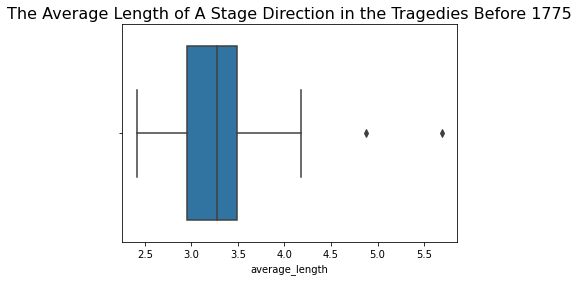

In [19]:
plt.title('The Average Length of A Stage Direction in the Tragedies Before 1775', fontsize=16)
sns.boxplot(x=before_1775['average_length'])
plt.show()

In [20]:
sperantov_data_five_acts[sperantov_data_five_acts.date < 1775][
sperantov_data_five_acts[sperantov_data_five_acts.date < 1775]['average_length'] > 5][['last_name', 
                                                                                         'first_name', 
                                                                                         'title', 
                                                                                         'date',
                                                                                         'average_length']]

,last_name,first_name,title,date,average_length
15,Rzhevskii,Aleksei,Podlozhyi Smerdii,1769,5.69


### Summary:
1. The mean frequency of stage direction in tragedies before 1775 was 4.69, with a standard deviation of 1.67, i.e., lower than in tragedies from 1775 to 1794 when the mean was 5.56 with a standard deviation of 1.79. The median was also lower in tragedies before 1775 (4.44) than in tragedies of from 1775 to 1794 (4.94).
2. The average length of a stage direction before 1775 was slightly higher (the mean of 3.40, with a standard deviation of 0.7). In the tragedies from 1775 to 1794, the mean was 3.33 with a standard deviation of 0.5. The high mean was caused by a high outlier (Aleksei Rzhevskii’s Podlozhyi Smerdii (1769)). The median was lower in tragedies before 1775 (3.28) than in tragedies from 1775 to 1794 (3.32).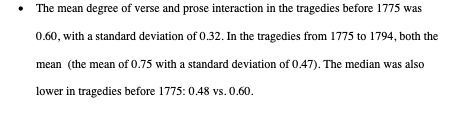
3. The mean degree of verse and prose interaction in the tragedies before 1775 was 0.60, with a standard deviation of 0.32. In the tragedies from 1775 to 1794, both the mean  (the mean of 0.75 with a standard deviation of 0.47). The median was also lower in tragedies before 1775: 0.48 vs. 0.60.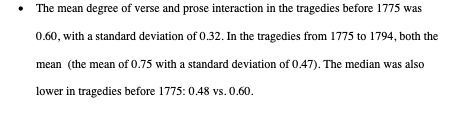

### Comedies After 1822

In [21]:
after_1822 = comedies_sorted[comedies_sorted.creation_date > 1822][['frequency', 
                                                                   'average_length',
                                                                   'verse_prose_interaction']].copy()

In [22]:
after_1822.describe().loc[['mean', 
                           'std',
                           '50%'],
                           ['frequency', 
                           'average_length',
                           'verse_prose_interaction']].round(2)

,frequency,average_length,verse_prose_interaction
mean,17.84,2.86,7.99
std,5.46,0.64,2.66
50%,15.89,2.76,8.77


### Summary:
1. The mean frequency of stage direction was higher in comedies after 1822 than in Comedies of Period Two (18.84, with a standard deviation of 5.46 vs. 18.51, with a standard deviation of 4.06). However, as we already mentioned, there was a low outlier in Period Two. The median frequency was higher in Period Two (19.60) than in comedies after 1822.
2. The average length of a stage direction was higher in comedies after 1822 than in comedies of Period Two (2.86, with a standard deviation of 0.64 vs. 2.23 with a standard deviation of 0.86). The median average length was also higher in comedies after 1822 than in comedies of Period Two (2.76 vs. 2.50).
3. The mean degree of verse and prose interaction was higher in comedies after 1822 than in Period Two (7.99, with a standard deviation of 2.66 vs. 6.12 with a standard deviation of 2.04). The median degree was also higher in comedies after 188: 8.77 vs. 7.74.

## Part 4. Conclusions:


1. The Russian five-act comedies in verse tended to have almost three times higher frequency of stage directions than tragedies.
2. On the contrary, tragedies tended to have lengthier stage directions.
3. The degree of verse and prose interaction in comedies s five times as high as the degree of verse and prose interaction in tragedies.